In [1]:
#Kerasを動かすバックエンド
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks

Using Theano backend.
C:\Users\81801\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\81801\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\81801\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\81801\anaconda3\envs\py36\lib\site-packages\t

In [2]:
#Kerasの必要なコンポーネントをインポート
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

In [3]:
#データを高速かつ効率的に使えるPandasをインポート
import pandas as pd
#数値計算を効率的に行うnumpyをインポート
import numpy as np

In [4]:
#グラフが簡単に描写できるMatplotlibをインポート
import matplotlib
import matplotlib.pyplot as plt

In [5]:
#各モジュールをインポート
import cv2
import copy
import os
import glob

In [6]:
path='./data/gakusyuu'
imgs=[]
labels=[]
f_=[0,0,0,0]
dirs = os.listdir(path)
dir_list = [f for f in dirs if os.path.isdir(os.path.join(path, f))]
for label in dir_list:
    file=glob.glob(path+"/"+label+"/*")
    temp=copy.copy(f_)
    temp[int(label)]=1
    
    for img_path in file:
        img_path=img_path
        img=cv2.imread(img_path,0)
        img=img[:, :, np.newaxis]
        imgs.append(img)
        labels.append(temp)
        #print(img_path)
        #print(np.shape(img))
        
X_train=np.asarray(imgs)
y_train=np.asarray(labels)

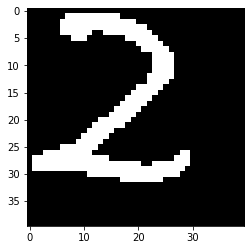

In [7]:
%matplotlib inline 
plt.imshow(X_train[1946].reshape(40,40),cmap = "gray")
plt.show()

In [8]:
y_train[1946]

array([1, 0, 0, 0])

In [9]:
path='./data/test'
imgs=[]
labels=[]
cnt=0
f_=[0,0,0,0]
file=glob.glob(path+"/*")
for img_path in file:
    temp=copy.copy(f_)
    if cnt>3:
        cnt-=4
    temp[cnt]=1
    cnt+=1
    img_path=img_path
    img=cv2.imread(img_path,0)
    img=img[:, :, np.newaxis]
    imgs.append(img)
    labels.append(temp)
    #print(img_path)
    #print(np.shape(img))
        
X_test=np.asarray(imgs)
y_test=np.asarray(labels)

In [10]:
print(X_train.shape)
print(y_train.shape)

(20000, 40, 40, 1)
(20000, 4)


In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
X_train /= 255
X_test /= 255

In [13]:
np.shape(X_train)

(20000, 40, 40, 1)

In [14]:
np.shape(X_test)

(19080, 40, 40, 1)

In [15]:
np.shape(y_train)

(20000, 4)

In [16]:
np.shape(y_test)

(19080, 4)

In [17]:
# モデルの宣言
model = Sequential()

In [18]:
# 先に作成したmodelへレイヤーを追加
import theano.ifelse
model.add(Conv2D(32, 3, 3,
                 activation='relu',
                 input_shape=(40,40,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

C:\Users\81801\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(40, 40, 1...)`
  """


In [19]:
# Learnig Processの設定
model.compile(loss='categorical_crossentropy',
optimizer='adamax',
metrics=['accuracy'])

In [20]:
# モデルの訓練（エポック２０）
history=model.fit(X_train, y_train, nb_epoch=20, validation_data = (X_train, y_train))

C:\Users\81801\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 20000 samples, validate on 20000 samples
Epoch 1/20
20000/20000 [==============================] - 53s 3ms/step - loss: 0.1293 - accuracy: 0.9575 - val_loss: 0.0524 - val_accuracy: 0.9850
Epoch 2/20
20000/20000 [==============================] - 54s 3ms/step - loss: 0.0366 - accuracy: 0.9898 - val_loss: 0.0161 - val_accuracy: 0.9967
Epoch 3/20
20000/20000 [==============================] - 53s 3ms/step - loss: 0.0206 - accuracy: 0.9943 - val_loss: 0.0153 - val_accuracy: 0.9952
Epoch 4/20
20000/20000 [==============================] - 53s 3ms/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.0054 - val_accuracy: 0.9990
Epoch 5/20
20000/20000 [==============================] - 54s 3ms/step - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 6/20
20000/20000 [==============================] - 54s 3ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.0023 - val_accuracy: 0.9998
Epoch 7/20
20000/20000 [==============================] - 55s 3ms/st

In [21]:
# テストデータを使ってモデルの評価
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print(loss_and_metrics)

19080/19080 [==============================] - 14s 738us/step
[0.026037156008579202, 0.9946016669273376]


In [22]:
#モデルの保存
result_dir='./data/result_adamax'
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
model.save_weights(os.path.join(result_dir,'weight.h5'))
model.save(os.path.join(result_dir,'model.h5'))

In [23]:
#データ抽出 (正解率)
acc=copy.copy(history.history["accuracy"])
acc.insert(0,0)
val_acc=copy.copy(history.history["val_accuracy"])
val_acc.insert(0,0)
print(acc)
print(val_acc)

[0, array(0.95755, dtype=float32), array(0.9898, dtype=float32), array(0.9943, dtype=float32), array(0.9971, dtype=float32), array(0.9979, dtype=float32), array(0.9989, dtype=float32), array(0.99865, dtype=float32), array(0.999, dtype=float32), array(0.9997, dtype=float32), array(0.9997, dtype=float32), array(0.9998, dtype=float32), array(1., dtype=float32), array(0.99975, dtype=float32), array(0.99985, dtype=float32), array(0.99995, dtype=float32), array(1., dtype=float32), array(0.9999, dtype=float32), array(1., dtype=float32), array(0.99995, dtype=float32), array(1., dtype=float32)]
[0, 0.9850000143051147, 0.996749997138977, 0.9951500296592712, 0.9990000128746033, 0.9995499849319458, 0.9998000264167786, 0.9998000264167786, 0.9994999766349792, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


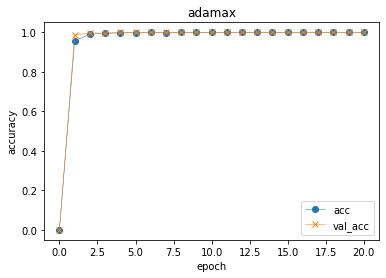

In [24]:
# 学習結果の描写 (正解率)
import matplotlib.pyplot as plt
import copy
#acc,val_accのプロット
plt.plot(acc, lw=0.5,label="acc", ls="-", marker="o")
plt.plot(val_acc,lw=0.5, label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("adamax")
plt.legend(loc="best")
#学習曲線の保存
plt.savefig(result_dir+'/adamax_acc.png')
plt.show()

In [25]:
#データ抽出 (損失)
loss=copy.copy(history.history["loss"])
loss.insert(0,0)
val_loss=copy.copy(history.history["val_loss"])
val_loss.insert(0,0)
print(loss)
print(val_loss)

[0, 0.12925251682400704, 0.036624553866079074, 0.020638926592143253, 0.011661788863292895, 0.008438462751894258, 0.005223253361240495, 0.004572304260570672, 0.0035510822749747605, 0.0017911273875681217, 0.0015742856643279084, 0.001130485360457351, 0.0006303373881764855, 0.000898535097151398, 0.000633486972918945, 0.00044598938924591495, 0.0003115822618061884, 0.00036089781484197373, 0.00033083676809651477, 0.00026071441945171045, 0.00012350228188540767]
[0, 0.0524160726480186, 0.016136818911205046, 0.015333829228492687, 0.00544746496423013, 0.003106989064424124, 0.0022713771467811968, 0.0017187567557799184, 0.0018151758393181807, 0.0006035789412254189, 0.0005416871486625723, 0.0003458683411143966, 0.0001669750471535508, 0.0003850857678451348, 0.00010643864327250866, 0.00011015153775738327, 6.690333615983946e-05, 0.00012471236526694155, 0.00010428137693656936, 3.930330949515337e-05, 5.233412758800568e-05]


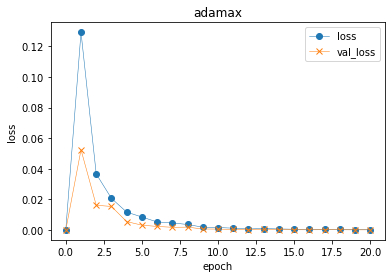

In [26]:
# 学習結果の描写 (損失)
import matplotlib.pyplot as plt
import copy
#loss,val_lossのプロット
plt.plot(loss, lw=0.5,label="loss", ls="-", marker="o")
plt.plot(val_loss,lw=0.5, label="val_loss", ls="-", marker="x")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("adamax")
plt.legend(loc="best")
#学習曲線の保存
plt.savefig(result_dir+'/adamax_loss.png')
plt.show()

In [27]:
# X_testを使って予測を行う
predictions = model.predict_classes(X_test)
x = list(predictions)
y = list(y_test)
results = pd.DataFrame({'Actual': y, 'Predictions': x})
results[1:10]

,Actual,Predictions
1,"[0, 1, 0, 0]",1
2,"[0, 0, 1, 0]",2
3,"[0, 0, 0, 1]",3
4,"[1, 0, 0, 0]",0
5,"[0, 1, 0, 0]",1
6,"[0, 0, 1, 0]",2
7,"[0, 0, 0, 1]",3
8,"[1, 0, 0, 0]",0
9,"[0, 1, 0, 0]",1


In [28]:
#構築モデルの確認
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 38, 38, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 19, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11552)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1478784   
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
Total params: 1,479,620
Trainable params: 1,479,620
Non-trainable params: 0
____________________________________________